In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import albumentations as A

import utils as ul

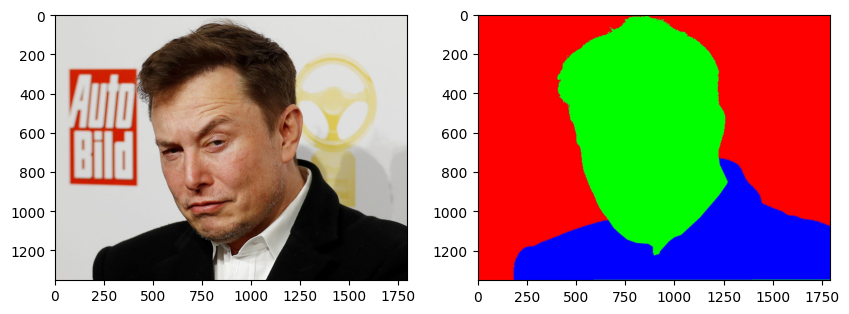

In [16]:
img = cv.imread('./images/elon.jpeg')
mask = cv.imread('./images/mask.jpeg')

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 2)
plt.imshow(mask)

plt.show()

In [17]:
transform = A.Compose([
    A.Resize(width=1920, height=1080),
    A.RandomCrop(width=1280, height=720),
    A.Rotate(limit=40, p=.9, border_mode=cv.BORDER_CONSTANT),
    
    A.HorizontalFlip(p=.5),
    A.VerticalFlip(p=.1),

    A.RGBShift(
        r_shift_limit=25,
        g_shift_limit=25,
        b_shift_limit=25,

        p=.9
    ),

    A.OneOf([  # In 100% of cases one these transformations will be chosen
        A.Blur(blur_limit=3, p=.5),
        A.ColorJitter(p=.5)
    ], p=1.)
], is_check_shapes=False)

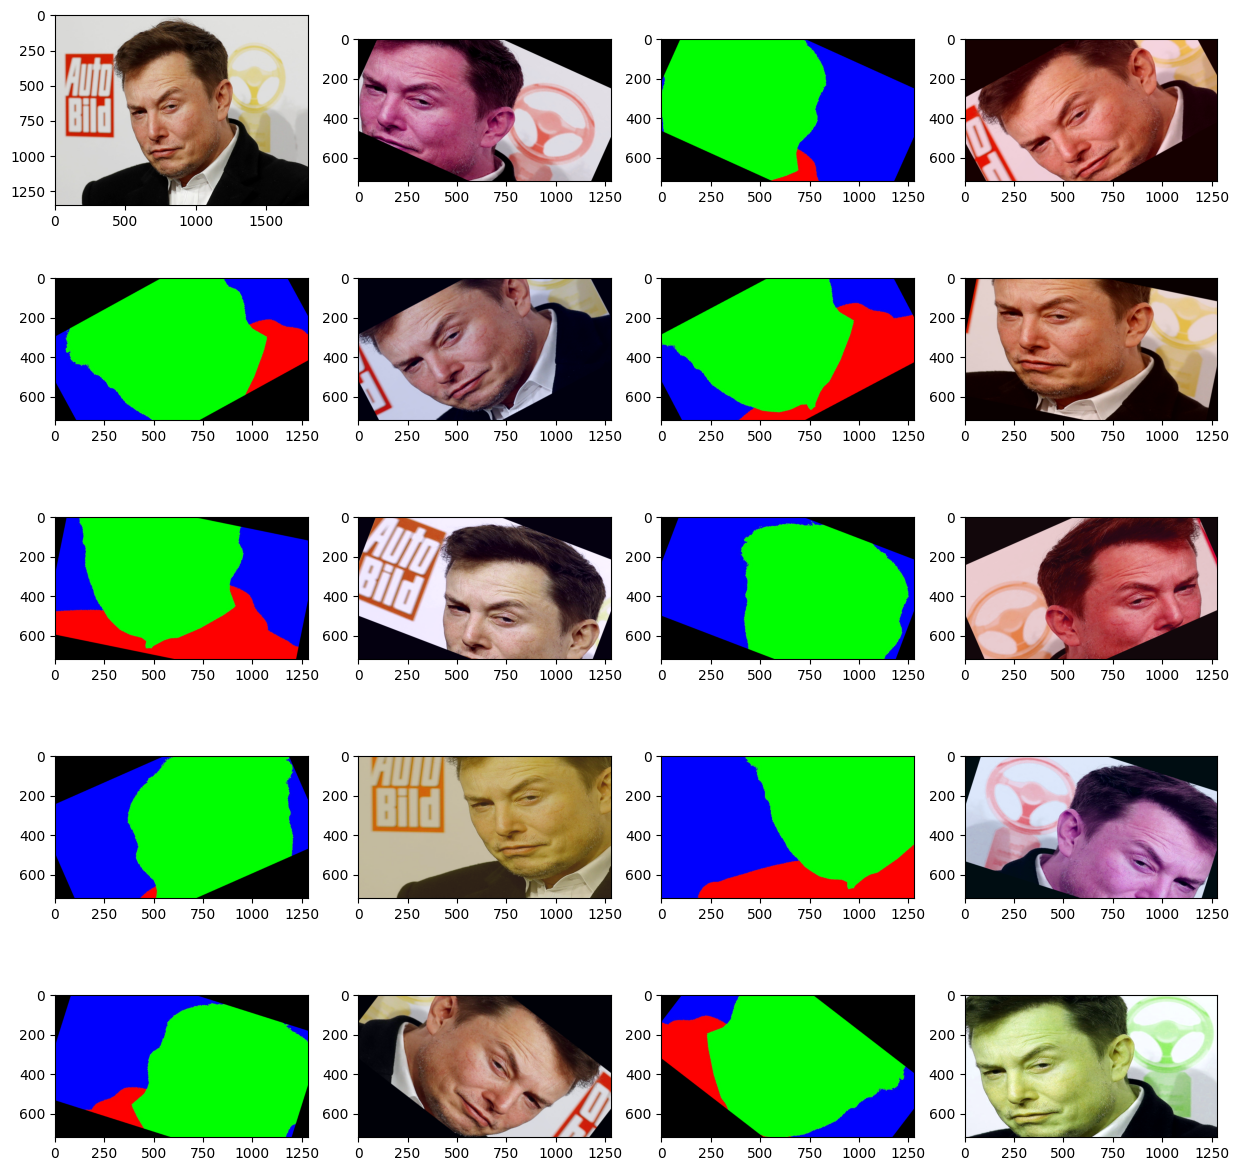

In [22]:
images_list = [img]

for _ in range(16):
    augmentations: dict = transform(image=img, mask=mask)
    
    augmented_img = augmentations['image']
    augmented_mask = augmentations['mask']

    images_list.append(augmented_img)
    images_list.append(augmented_mask)

ul.plot_examples(images_list, convert_to_rgb=True)

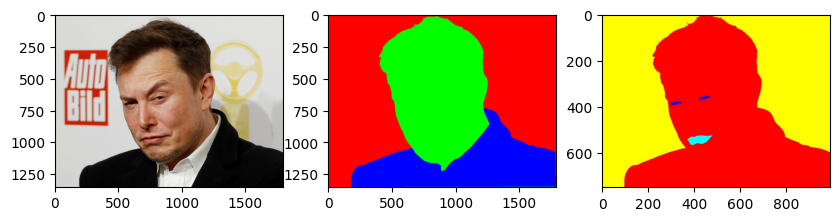

In [23]:
img = cv.imread('./images/elon.jpeg')
mask = cv.imread('./images/mask.jpeg')
mask2 = cv.imread('./images/second_mask.jpeg')

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 2)
plt.imshow(mask)

fig.add_subplot(rows, columns, 3)
plt.imshow(mask2)

plt.show()

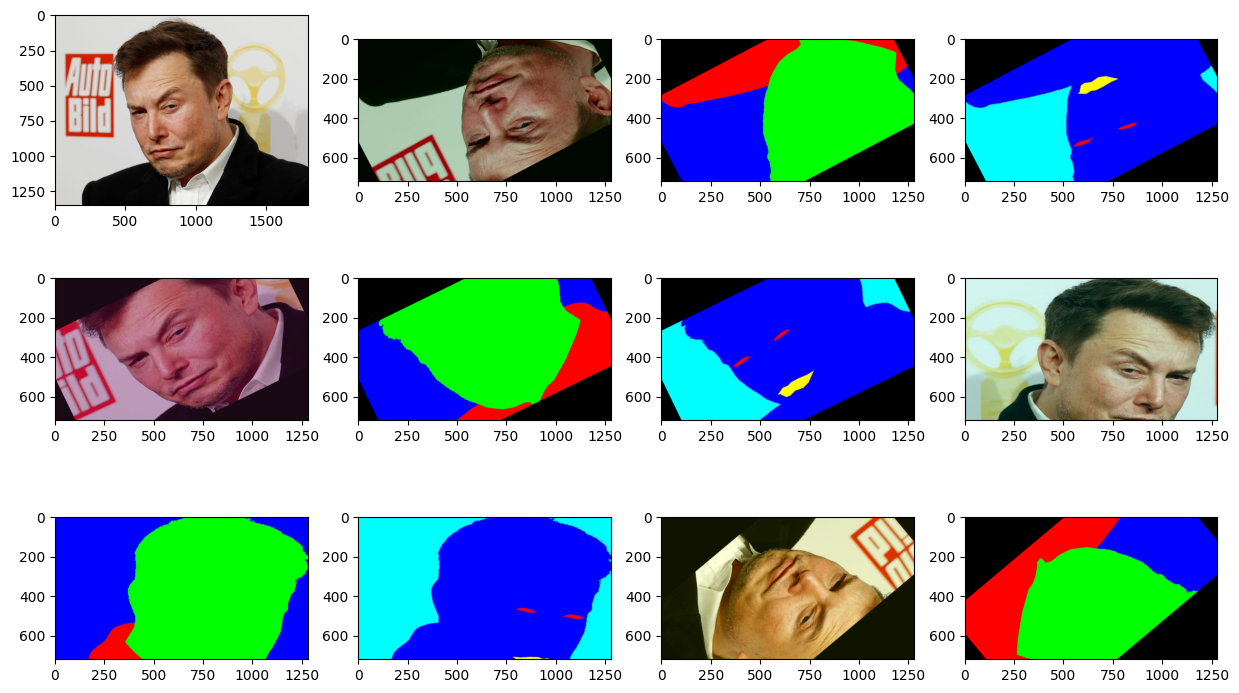

In [24]:
images_list = [img]

for _ in range(4):
    augmentations: dict = transform(image=img, masks=[mask, mask2])
    
    augmented_img = augmentations['image']
    augmented_masks = augmentations['masks']

    images_list.append(augmented_img)
    images_list.append(augmented_masks[0])
    images_list.append(augmented_masks[1])


ul.plot_examples(images_list, convert_to_rgb=True)